# Question

During campus interviews, company XYZ typically evaluates students based on their test scores from the company's assessment, their % of mark, and interview performance. However, moving forward, the company has decided not to interview all students and instead needs to filter candidates before scheduling interviews.

The company possesses historical data that includes test scores, CGPA, and selection outcomes for previous candidates. This data will be utilized to predict whether a new candidate, with a specific test score and CGPA, will be selected for an interview or not.

Data Set: interviewData.csv

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('interviewData.csv',header=None)
df.columns = ['Exam Mark','test score','Selection']
df.head()

,Exam Mark,test score,Selection
0,34.623660,78.024693,No
1,30.286711,43.894998,No
2,35.847409,72.902198,No
3,60.182599,86.308552,Yes
4,79.032736,75.344376,Yes


### Exploratory data analysis


**Answer the following:**
* What is your target variable?
> * The target variable is selection, 'Yes' or 'No' in the given dataset (binary representation as 1 or 0) , which indicates whether to select the candidate or not.
* Do you need to encode the target variable (Yes/No)?
> * Yes.
* If yes, briefly explain why you need to encode the target variable.
> * Yes, it is needed to encode the target variable as it is required to train classification models precisely.
* Consider the encoding methods: One-hot encoding, Binary encoding, and Label Encoding. Which one do you apply in this case?
> * Label Encoding, so as to encode the target variable.
* Explain why you have selected the above encoding method.
> * Label Encoding changes the two categories—selected and not selected—to 0 and 1, respectively, since there are only two possible outcomes. This approach simplifies the data processing for machine learning algorithms without introducing additional complexity, making it perfect for binary classification tasks.

Read the following article

https://medium.com/@swayampatil7918/exploring-different-encoding-techniques-for-machine-learning-models-b762e3b546db

In [4]:
# Create a new dataset by apply the encoding  method selected above on the dataset

# Read this to implement this part
#  https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

from sklearn import preprocessing

from sklearn.preprocessing import LabelEncoder


# Select the appropriate encode
# Create a LabelEncoder object
label_encoder = LabelEncoder()


# Transform the target variable
# Encode the 'Selection' column (assuming it's the target variable)
df['Selection_encoded'] = label_encoder.fit_transform(df['Selection'])


# Display the modified DataFrame with the encoded target variable
display(df)



,Exam Mark,test score,Selection,Selection_encoded
0,34.623660,78.024693,No,0
1,30.286711,43.894998,No,0
2,35.847409,72.902198,No,0
3,60.182599,86.308552,Yes,1
4,79.032736,75.344376,Yes,1
...,...,...,...,...
95,83.489163,48.380286,Yes,1
96,42.261701,87.103851,Yes,1
97,99.315009,68.775409,Yes,1
98,55.340018,64.931938,Yes,1


<Axes: xlabel='Exam Mark', ylabel='test score'>

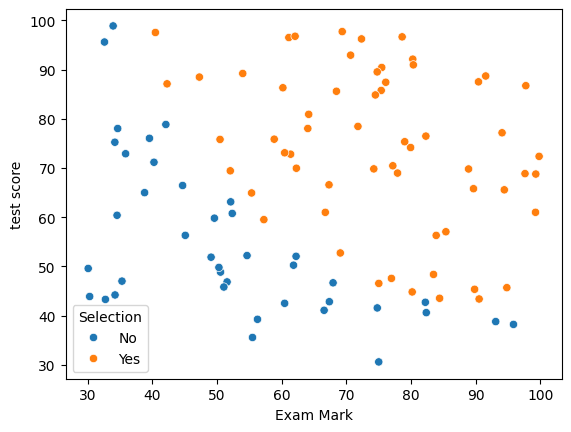

In [5]:
# Wrie a code to visualize your data
# See https://seaborn.pydata.org/generated/seaborn.scatterplot.html

import seaborn as sns
sns.scatterplot(data=df,x = 'Exam Mark',y='test score',hue ='Selection')

## Logistic Regression Model

logistic regression model applies the sigmoid to the familiar linear regression model as shown below:

$$ \hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot \mathbf{x}^{(i)} + b ) $$

  where

  $$g(z) = \frac{1}{1+e^{-z}}$$

That is
$$\hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \frac{1}{1+e^{-(\mathbf{w} \cdot \mathbf{x}^{(i)} + b )}}$$

In [6]:
# Write a function 'predict' to compute the logistic Regression model
x=df[['Exam Mark','test score']].values
y=df['Selection']
w=np.linspace(-10,10,1000)
b=0


def Sigmoid(z):
      # remove it after completing your code
  return 1/(1+np.exp(-z))

def predict(w,b,x):
  # Your code
  z=np.dot(x,w)+b
  y_hat=Sigmoid(z)
  return y_hat
  # remove it after completing your code

### Answer the following


* Can you use mean squared error as the cost function (Yes/No)?
> * No
* Explain why you said yes or no to the above questions.
> * MSE(Mean Square Error) is not suitable for logistic regression as it's meant for regression, not for classification. Logistic regression predicts probabilities between 0 and 1, while MSE penalizes deviations between predicted and actual continuous values.

### Log Loss/ Sigmoid Cross Entropy for Logistic regression

     


$$ loss(\hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(\hat y_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - \hat y_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) $$

### Cost function


$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(\hat y_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right]$$

### Answer the following


* What is a loss function?
> * A loss function measures the error between the predicted values of a model and the actual values in the training data. It quantifies how well the model is performing on individual data points.
* What is a cost function?
> * A cost function, also known as an error function, quantifies the "cost" or "error" of a machine learning model's predictions compared to the true values in the training dataset. Its purpose is to measure how well the model is performing.
* What is the distinction between them?
> * The model's performance is quantified by both the loss and cost functions; the loss function evaluates the model's performance at the level of individual data points, while the cost function does so for the entire dataset.

### Derivative of the cost function with respect to weights

Type here the formulas to compute the derivatives of the const function with respect to $w_1$, $w_2$ and b




In [7]:
# write a function to estimate the derivatives of the cost function
def cost_fn(w,b,x,y):
  M, N = x.shape
  loss=np.zeros((M,))
  for i in range(M):
      loss[i]=-y[i]*np.log(predict(w,b,x[i]))-(1-y[i])*np.log(1-predict(w,b,x[i]))
  return np.mean(loss)

def compute_gradient(w,b,x,y):
  J_train_values = []  # to store train loss values
  J_test_values = []   # to store test loss values
  M,N = x.shape
  dJ_dw = np.zeros((N,))
  dJ_db = 0
  for i in range(M):
    error = predict(w,b,x[i])-y[i]
    for j in range(N):
      dJ_dw[j] += error*x[i,j]
    dJ_db += error
  dJ_dw /= M
  dJ_db /= M

  return dJ_dw,dJ_db

### Gradient Descent Algorithm

$$\begin{align*}
&\text{repeat until convergence:} \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j}   \; & \text{for j := 0..n-1} \\
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

In [8]:
# Write a function to perform the gradient decent

def gradient_descent(w,b,X_train,X_test,y_train,y_test,alpha,num_iter):
  J_values = [1]
  for i in range(num_iter):
    dj_dw,dj_db= compute_gradient(w,b,X_train,y_train)

    w = w - alpha*dj_dw
    b = b - alpha*dj_db


    J_values.append(cost_fn(w,b,X_train,y_train))

    if i%10 == 0:
      print(f"{i:4d}th iteration----------------- cost:{J_values[-1]}")

  return w,b

## Model Training

In [12]:
# Write the code to train the model

# Split the data into train and test datasets using
# see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

# get the data from dataFrame
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# split the dataset such that 20% test and 80% train data
X_train, X_test, y_train, y_test =train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=None) #your code


# initilize the weights
np.random.seed(1)
w_ini = np.random.rand(2)
b_ini = -9

# Fix the learning rate
alpha = 0.001

# fix the number of iteration
num_iter = 1000


w,b= gradient_descent(w_ini,b_ini,X_train, X_test, y_train, y_test,alpha,num_iter)
print(f"Final parameters: w:{w}, b:{b}")

<ipython-input-7-7fc7804305c5>:6: RuntimeWarning: divide by zero encountered in log
  loss[i]=-y[i]*np.log(predict(w,b,x[i]))-(1-y[i])*np.log(1-predict(w,b,x[i]))
<ipython-input-7-7fc7804305c5>:6: RuntimeWarning: invalid value encountered in scalar multiply
  loss[i]=-y[i]*np.log(predict(w,b,x[i]))-(1-y[i])*np.log(1-predict(w,b,x[i]))


   0th iteration----------------- cost:nan
  10th iteration----------------- cost:nan
  20th iteration----------------- cost:2.382298930819034
  30th iteration----------------- cost:0.8404690267629957
  40th iteration----------------- cost:0.5478158260141084
  50th iteration----------------- cost:0.3794783358688105
  60th iteration----------------- cost:0.31332066135806913
  70th iteration----------------- cost:0.29363975057186464
  80th iteration----------------- cost:0.2883877060650599
  90th iteration----------------- cost:0.28701922640119826
 100th iteration----------------- cost:0.28666186466290444
 110th iteration----------------- cost:0.2865669768996133
 120th iteration----------------- cost:0.28654038913891544
 130th iteration----------------- cost:0.2865316146942241
 140th iteration----------------- cost:0.28652749288939755
 150th iteration----------------- cost:0.28652458735725184
 160th iteration----------------- cost:0.286521999987991
 170th iteration----------------- cost:

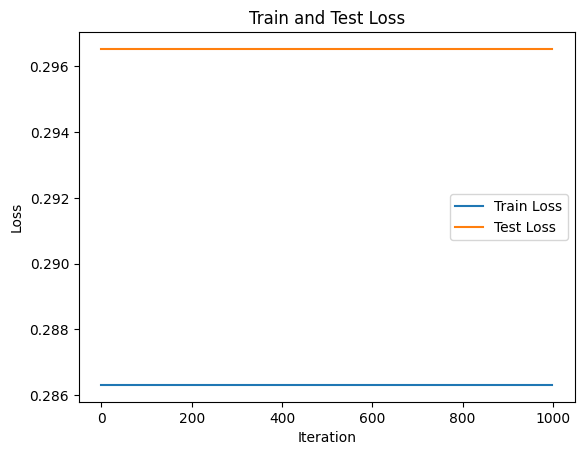

In [15]:
# Plot the train and test loss in one plot
J_train_values = []
J_test_values = []
# Plot train and test loss
def check_loss(w, b, X_train, X_test, y_train, y_test,num_iter):
  for i in range(num_iter):
    # Compute train and test loss
    J_train = cost_fn(w, b, X_train, y_train)
    J_test = cost_fn(w, b, X_test, y_test)

    # Append loss values to lists
    J_train_values.append(J_train)
    J_test_values.append(J_test)

# Call check_loss function to collect loss values
check_loss(w, b, X_train, X_test, y_train, y_test,num_iter)


# Plot train and test loss
plt.plot(J_train_values, label='Train Loss')
plt.plot(J_test_values, label='Test Loss')

# Add labels and title
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Train and Test Loss')

# Add legend
plt.legend()

# Show plot
plt.show()


<Axes: xlabel='Exam Mark', ylabel='test score'>

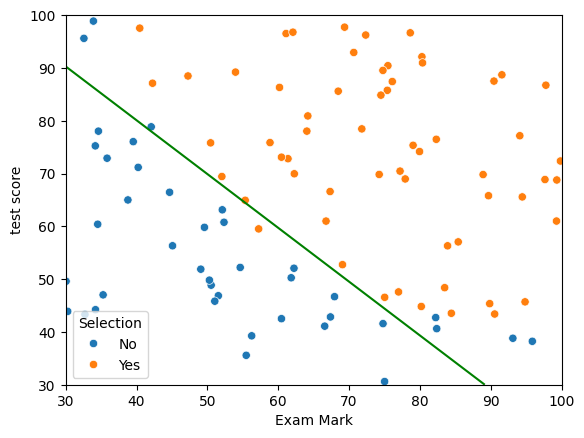

In [16]:
#  plot the Logistic Regression Model for the estimated w and b values

P = 0.5 # the boundary seperation value (probability)

# Generate sample points in the domain 30 to 100
u = np.linspace(30, 100, 50)
v = np.linspace(30, 100, 50)

# making it into 2D mesh
X, Y = np.meshgrid(u, v)
logReg = np.zeros((len(u), len(v)))

# Predict the result of the (u,v) pair data with the estimated w and b values
for i in range(len(u)):
    for j in range(len(v)):
      zz = X[i,j]*w[0]+Y[i,j]*w[1]+b
      logReg[i,j] = 1/(1+np.exp(-zz))


plt.contour(u,v,logReg, levels = [P], colors="g" )

# to see the full function plot in the domain
# plt.contourf(u,v,logReg)

# Plot the real data
sns.scatterplot(df,x = 'Exam Mark',y='test score',hue ='Selection')


### Answer the following


* What does the P value signify in the provided code?
> * In the provided code, the P value signifies the boundary separation value, specifically the probability threshold used for classification in logistic regression. This means that data points with a predicted probability above P are classified into one category (often labeled as class 1), while those below P are classified into another category (often labeled as class 0).
* How will altering the P value affect the outcome?
> * By modifying the logistic regression model's method of classifying data points, changing the P value will modify the border decision threshold and impact the final result. A more lenient categorization would result in more data points being labeled as positive; a more severe classification would result in fewer data points being classified as positive.e.
* What range of values can P encompass?
> * The P value ranges in between 0 and 1, that represents the probability of a data point belonging to a certain class.
* Describe the importance of the P value in a project aimed at classifying tumors as malignant or benign.
> * In a project aimed at classifying tumors as malignant or benign, the P value is important as it determines the threshold for classifying tumors based Here P is set to 0.5, tumors with a predicted probability of malignancy above 0.5 would be classified as malignant, while those below 0.5 would be classified as benign. Adjusting P can impact the sensitivity and specificity of the classification model, influencing its performance in accurately identifying malignant tumors while minimizing false positives or false negatives.

### Imagine a scenario where a student scores 65 marks in both the Exam and Test. Use your model to predict whether the student will pass the interview or not.

In [19]:
# Your code
# Given student's exam and test scores
exam_score = 65
test_score = 65

# Calculate linear combination
z = exam_score * w[0] + test_score * w[1] + b

# Calculate probability of passing the interview
probability_pass = 1 / (1 + np.exp(-z))

# Compare probability with boundary separation value P
if probability_pass > P:
    prediction = "The student will pass the interview"
else:
    prediction = "The student will fail the interview "

print(prediction)


The student will pass the interview
